In [45]:
import numpy as np
import json
import json
import matplotlib.pyplot as plt

1. import data from pred_segments
2. get list of [confidence scores, right prediction?] for each specie
3. apply logistic regression for these values
   1. the idea is to understand for which threshold we have a right prediction

In [6]:
with open("utils/conf_scores.json", "r") as f:
    conf_scores = json.load(f)

conf_scores

{'Certhia familiaris_Eurasian Treecreeper': [[0.31665876507759094, True],
  [0.1000199094414711, True]],
 'Dendrocopos major_Great Spotted Woodpecker': [[0.9670880436897278, True],
  [0.9595276117324829, True],
  [0.6463632583618164, True],
  [0.9791899919509888, True],
  [0.8687033653259277, True],
  [0.794307291507721, True]],
 'Dryocopus martius_Black Woodpecker': [[0.5210121870040894, True]],
 'Erithacus rubecula_European Robin': [[0.14199960231781006, True],
  [0.8360713124275208, True],
  [0.48424577713012695, True],
  [0.10553303360939026, True],
  [0.40546056628227234, True],
  [0.15335634350776672, True],
  [0.3985914885997772, True],
  [0.5811851620674133, True],
  [0.18697021901607513, False],
  [0.6362138390541077, False],
  [0.5382189154624939, True],
  [0.6145408749580383, True],
  [0.6541234254837036, False],
  [0.2171713411808014, False],
  [0.15206047892570496, False]],
 'Fringilla coelebs_Common Chaffinch': [[0.8737625479698181, True],
  [0.16329829394817352, False],


In [54]:
from sklearn.model_selection import train_test_split

dataset = np.array(conf_scores["Erithacus rubecula_European Robin"])
X = dataset[:, 0].reshape(-1, 1)
y = dataset[:, 1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=123, stratify=y)
len(X_test), len(y_test)

(8, 8)

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=123)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.625

In [57]:
lr.predict(y_train)

array([1., 1., 1., 1., 1., 1., 1.])

In [60]:
X_train, X_test

(array([[0.40546057],
        [0.58118516],
        [0.15335634],
        [0.39859149],
        [0.1419996 ],
        [0.63621384],
        [0.21717134]]),
 array([[0.65412343],
        [0.18697022],
        [0.61454087],
        [0.83607131],
        [0.15206048],
        [0.53821892],
        [0.48424578],
        [0.10553303]]))

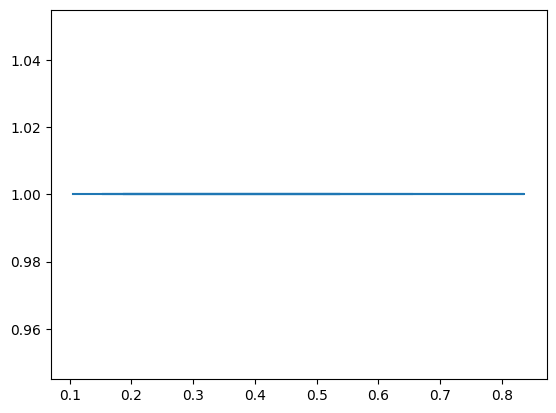

In [58]:
plt.plot(X_test, lr.predict(X_test))